In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt 
from datetime import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



In [3]:
def parser(x):
    return datetime.strptime(x, "%d.%m.%Y")

In [4]:
sale_df = pd.read_csv("Month_Value.csv", header=0, index_col=0, parse_dates=[0], date_parser=parser)


In [5]:
print("Dataset Size: ")
print(f"Samples: {sale_df.shape[0]} Columns: {sale_df.shape[1]}")

Dataset Size: 
Samples: 96 Columns: 4


In [6]:
sale_df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-08-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN


In [7]:
sale_df = sale_df[['Sales_quantity']]


C:\Users\himanshu\AppData\Local\Temp\ipykernel_38124\1598092839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df.dropna(how='any', axis=0, inplace=True)


# Remove Null Value

Here we will keep only one column that is sales quantity as our tasks is to make prediction for it.

In [ ]:
sale_df.dropna(how='any', axis=0, inplace=True)

In [8]:
sale_df

,Sales_quantity
Period,
2015-01-01,12729.0
2015-02-01,11636.0
2015-03-01,15922.0
2015-04-01,15227.0
2015-05-01,8620.0
...,...
2019-12-01,38069.0
2020-01-01,27184.0
2020-02-01,23509.0


In [9]:
sale_df.info()
     

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2015-01-01 to 2020-04-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sales_quantity  64 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [14]:
sale_df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


# Visualize Time Series

Dataset:  (Top 5 Rows)

            Sales_quantity
Period                    
2015-01-01         12729.0
2015-02-01         11636.0
2015-03-01         15922.0
2015-04-01         15227.0
2015-05-01          8620.0


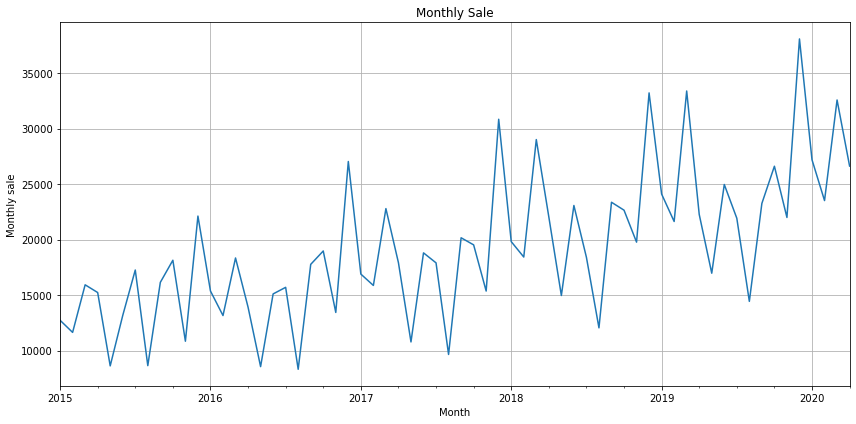

In [10]:
import matplotlib.pyplot as plt 
print('=================================================================')
print('Dataset:  (Top 5 Rows)\n')
print(sale_df.head())

print('=================================================================')
# Visualize data.
sale_df['Sales_quantity'].plot(figsize=(12, 6))
plt.ylabel("Monthly sale")
plt.xlabel("Month")
plt.title("Monthly Sale")
plt.tight_layout()
plt.grid()
plt.savefig("Line Plot - Monthly Shampoo Sale.png")
plt.show()

# Autocorrelation Plot

This plot is ued to find out lag value to be used in the ARIMA model.

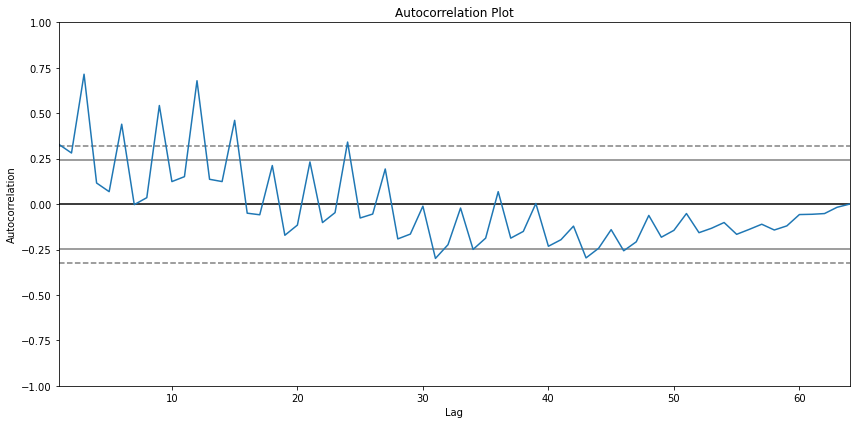

In [11]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12, 6)) 
plt.title("Autocorrelation Plot")
autocorrelation_plot(sale_df)
plt.tight_layout()
plt.grid()
# plt.savefig("Autocorrelation Plot.png")
plt.show()

In above graph we observed that the lag values from 1 till 12 are above the confidence interval(Most of the time). We will try and find out best lag value from this set.



# ARIMA (AutoRegressive Integrated Moving Average) Forecast Model

C:\Users\himanshu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   64
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -611.612
Date:                Thu, 28 Dec 2023   AIC                           1237.224
Time:                        09:26:00   BIC                           1252.226
Sample:                    01-01-2015   HQIC                          1243.124
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5668      0.101     -5.629      0.000      -0.764      -0.369
ar.L2         -0.2448      0.106     -2.300      0.021      -0.453      -0.036
ar.L3          0.3336      0.141      2.368      0.0

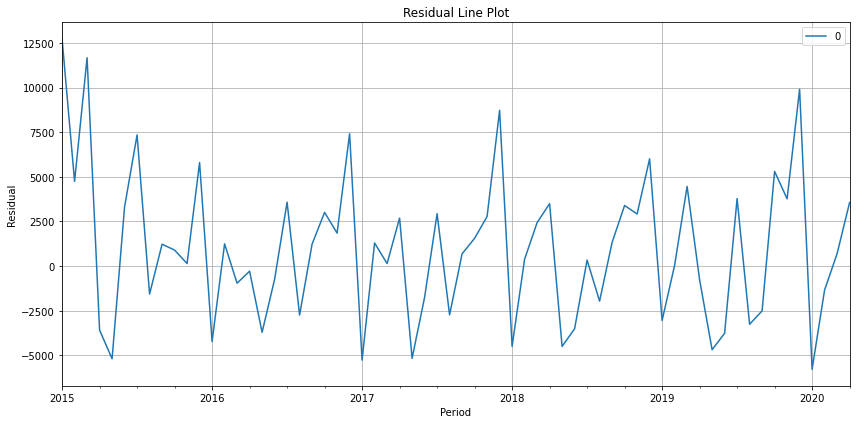

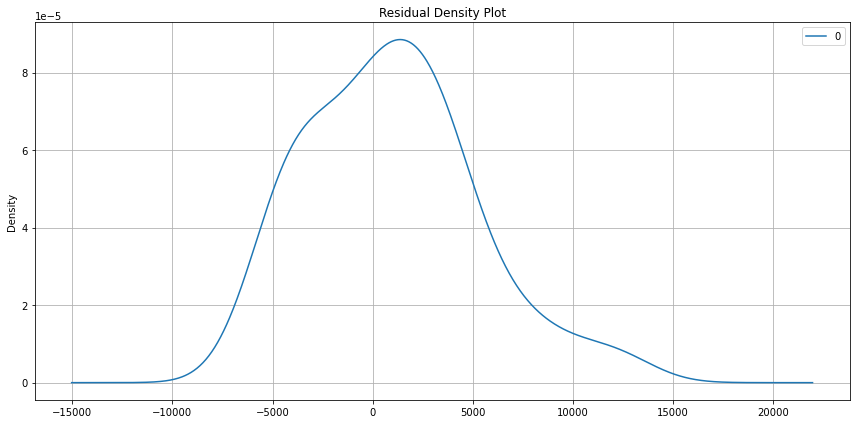

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model.
model = ARIMA(sale_df, order=(6, 1, 0), freq='MS')
model_fit = model.fit()

print("======================================================================================")
# Fit model summary.
print(model_fit.summary())

# Line plot of residual. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12, 6))
plt.title("Residual Line Plot")
plt.ylabel("Residual")
plt.tight_layout()
plt.grid()
plt.show()

# Density plot of residuals. 
residuals.plot(kind='kde', figsize=(12, 6))
plt.title("Residual Density Plot")
plt.tight_layout()
plt.grid()
plt.savefig("Density Plot.png")
plt.show()


From above residual plot we can obsere that there is no trend in the series. Density plot indicates that errors are gaussion distributed but not centered around 0.



# Rolling Forecast ARIMA Model

In rolling forecast we will re-create the ARIMA model after each new observation is received.

Predictions: 
Predicted Sale = 18013.164809, Actual Sale = 18397.000000
Predicted Sale = 14617.027085, Actual Sale = 12045.000000
Predicted Sale = 21575.253534, Actual Sale = 23358.000000
Predicted Sale = 18676.228352, Actual Sale = 22644.000000
Predicted Sale = 16784.424267, Actual Sale = 19765.000000
Predicted Sale = 27086.165546, Actual Sale = 33207.000000
Predicted Sale = 27746.815275, Actual Sale = 24096.000000
Predicted Sale = 21904.130318, Actual Sale = 21624.000000
Predicted Sale = 28539.186945, Actual Sale = 33379.000000
Predicted Sale = 22600.790552, Actual Sale = 22265.000000
Predicted Sale = 22027.878911, Actual Sale = 16967.000000
Predicted Sale = 28923.573230, Actual Sale = 24958.000000
Predicted Sale = 17452.903262, Actual Sale = 21917.000000
Predicted Sale = 17607.942952, Actual Sale = 14431.000000
Predicted Sale = 25644.681907, Actual Sale = 23253.000000
Predicted Sale = 21682.513792, Actual Sale = 26603.000000
Predicted Sale = 17859.480270, Actual Sale = 21987.000000


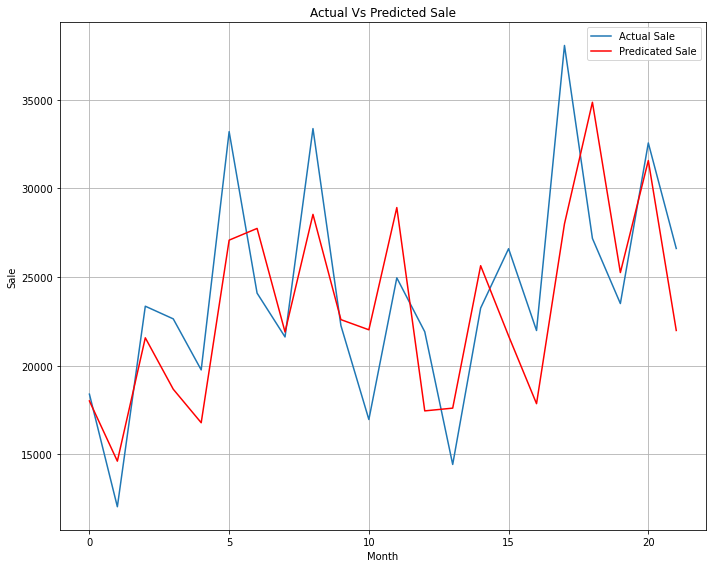

In [13]:
# split into train and test sets
X = sale_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
print("================================================================")
print("Predictions: ")
for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted Sale = %f, Actual Sale = %f' % (yhat, obs))


# evaluate forecasts
print("================================================================")
print("Accuracy: ")
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print("================================================================")

# plot forecasts against actual outcomes
plt.figure(figsize=(10, 8)) 
plt.plot(test, label="Actual Sale")
plt.plot(predictions, color='red', label="Predicated Sale")
plt.title("Actual Vs Predicted Sale")
plt.xlabel("Month")
plt.ylabel("Sale")
plt.legend()
plt.tight_layout()
plt.grid()
# plt.savefig("Line Plot.png")
plt.show()